<a href="https://colab.research.google.com/github/josphat-19/ml/blob/main/uci_magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# **Dataset**

MAGIC Gamma Telescope
Donated on 4/30/2007
Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope



In [3]:
cols = ['flength', 'fwidth', 'fsize', 'fconc', 'fconc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)
df.head()

,flength,fwidth,fsize,fconc,fconc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
df['class'] = (df['class'] == 'g').astype(int)

In [6]:
df.head()

,flength,fwidth,fsize,fconc,fconc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


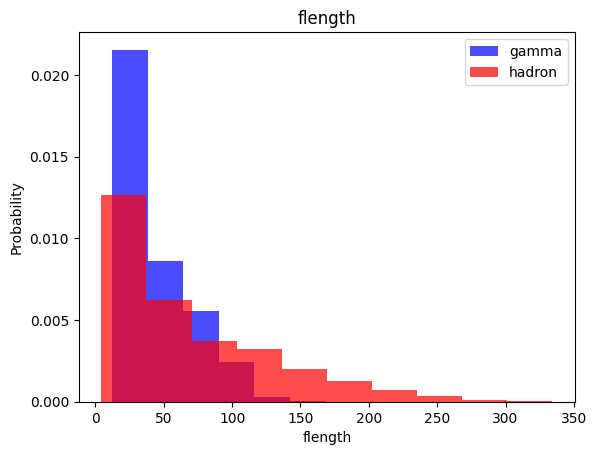

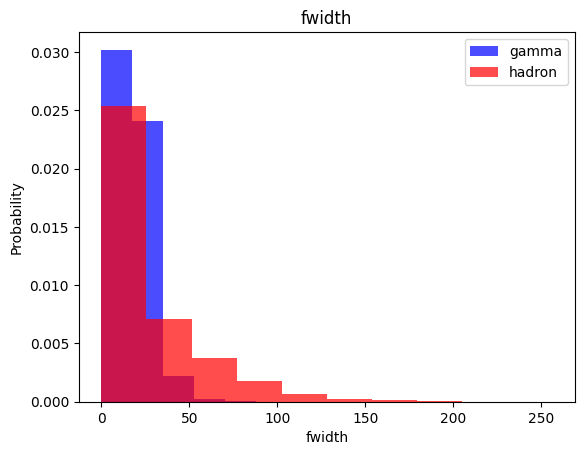

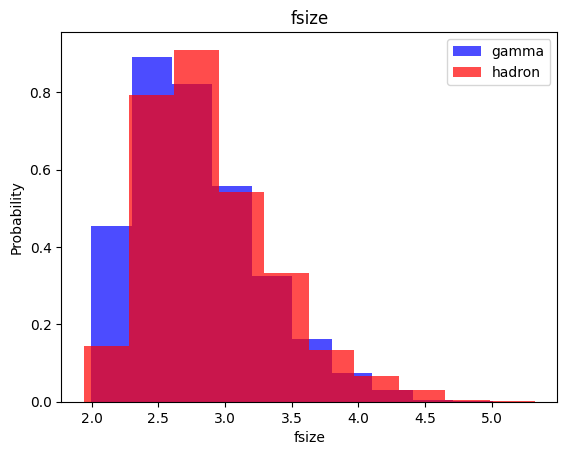

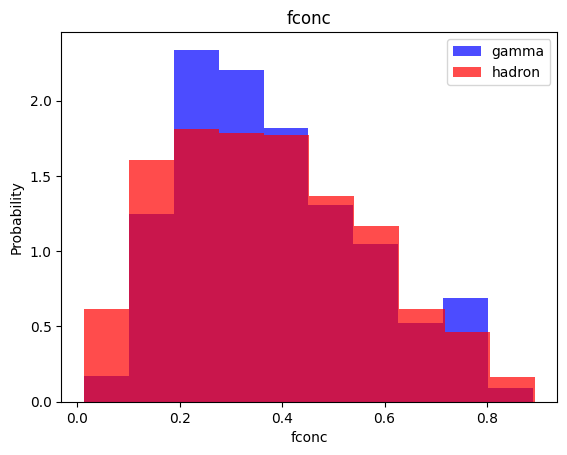

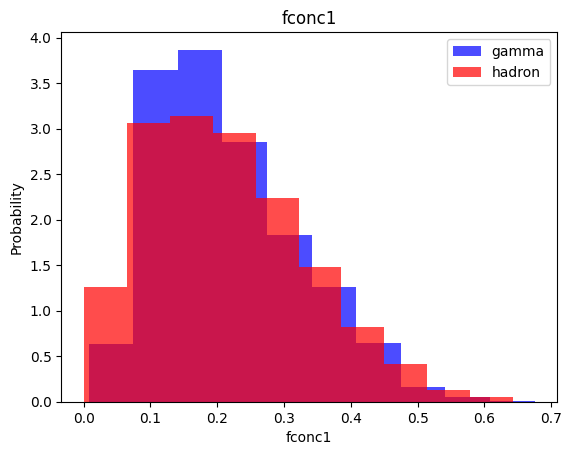

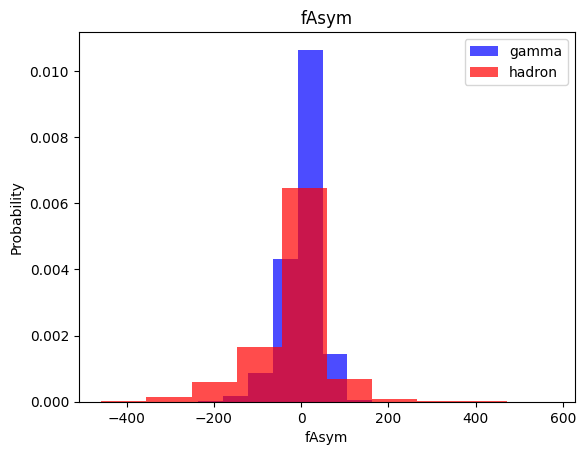

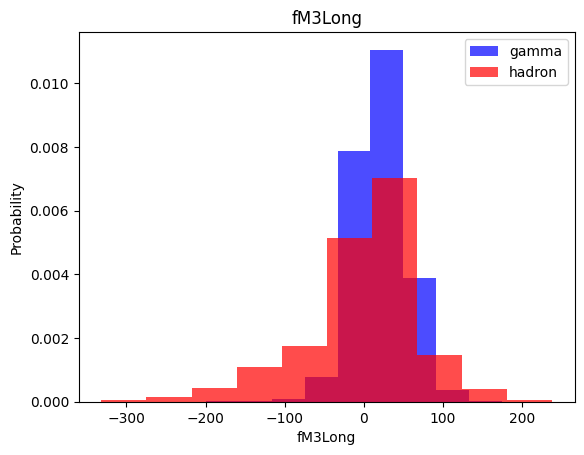

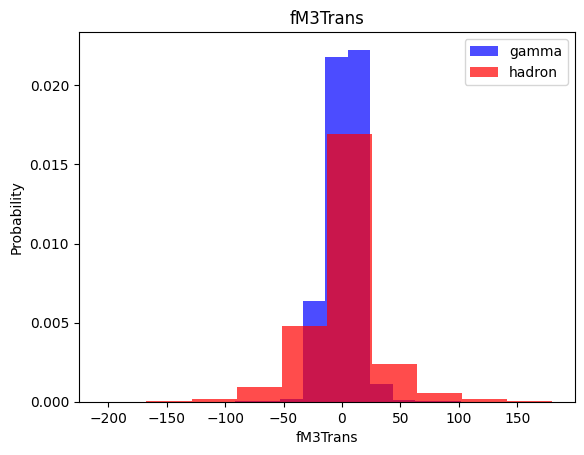

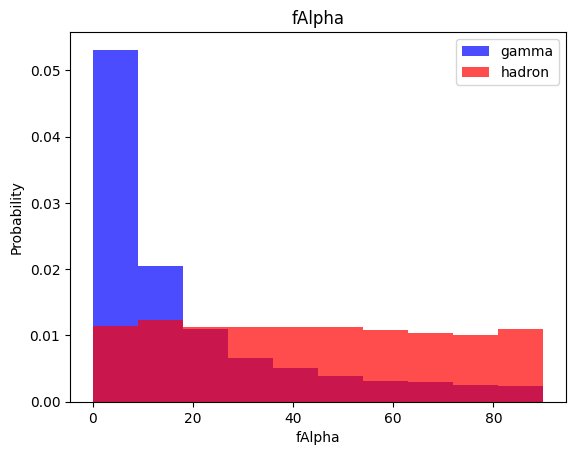

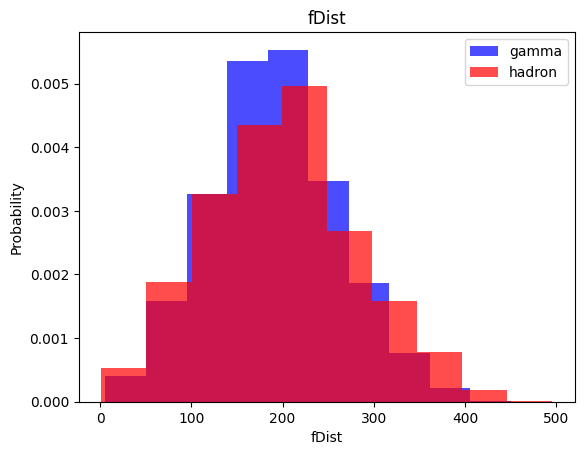

In [11]:
for label in cols[:-1]:
  plt.hist(df[df['class'] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class'] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, validation, test datasets

In [42]:
from sklearn.model_selection import train_test_split

# Split into training (60%), validation (20%), and test (20%) sets
# First, split into train (60%) and temp (40%)
train, temp = train_test_split(df, test_size=0.4, random_state=42) # Using a random_state for reproducibility

# Then, split temp (40%) into validation (20%) and test (20%)
# Since temp is 40% of the original data, we split temp in half (0.5) to get 20% for valid and 20% for test
valid, test = train_test_split(temp, test_size=0.5, random_state=42)

print(f"Training set size: {len(train)}")
print(f"Validation set size: {len(valid)}")
print(f"Test set size: {len(test)}")

Training set size: 11412
Validation set size: 3804
Test set size: 3804


In [36]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [43]:
train, x_train, y_train = scale_dataset(train, oversample=True)
train, x_valid, y_valid = scale_dataset(valid, oversample=False)
train, x_test, y_test = scale_dataset(test, oversample=False)

# **Model training**

## kNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [58]:
knn__model = KNeighborsClassifier(n_neighbors=5)
knn__model.fit(x_train, y_train)

KNeighborsClassifier()

In [59]:
y_pred = knn__model.predict(x_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1317
           1       0.86      0.87      0.87      2487

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.81      3804
weighted avg       0.82      0.82      0.82      3804



## Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [70]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1317
           1       0.74      0.90      0.81      2487

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



## Logistic regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [73]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1317
           1       0.85      0.83      0.84      2487

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



## Support vector machines (svm)

In [74]:
from sklearn.svm import SVC

In [75]:
svm_model = SVC()
svm_model =  svm_model.fit(x_train, y_train)

In [76]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1317
           1       0.90      0.90      0.90      2487

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804

